# 📋 Today's Battle Plan: CNN Implementation
## 🎯 Mission: Push from 97% → 99%+
- Total Time: 2-2.5 hours
- Current Accuracy: 97% (Dense + Adam)
- Target Accuracy: 99%+ (CNN)

## 📊 Session Breakdown
### Part 1: Quick Theory Recap (10 min)
"Let's refresh what we learned yesterday"
Quick Q&A to cement understanding:

- What does convolution do?
- Why pooling?
- How does a CNN "see" an image differently than dense network?

### Part 2: Build Your First CNN (45 min)
"Code first, iterate fast!"

**The Plan:**

1. Simple CNN (10 lines in Keras!)

    ```
        Conv2D → MaxPool → Conv2D → MaxPool → Dense → Output
    ```

2. Train and compare to your dense network
3. Watch accuracy jump to 99%+

### Part 3: Visualize What CNN Learned (30 min)
"See the magic happening"

1. Visualize filters - What patterns did Layer 1 learn?
2. Feature maps - How does the network "see" a digit?
3. Intermediate activations - What happens at each layer?

This is where theory becomes **tangible!**

### Part 4: Experiments & Optimization (30 min)
"Make it even better!"
Try:

- Different architectures (more layers? different filter sizes?)
- Data augmentation (rotation, zoom, shift)
- Dropout for regularization
- Batch normalization

**Goal:** Push accuracy as high as possible!

### Part 5: Dense vs CNN Battle (15 min)
"Side-by-side comparison"

Create a comparison table:

- Accuracy
- Parameters
- Training time
- Confusion matrices

**Declare the winner! 🏆**

**Keep this snippet handy while building**

```py
# Data Preprocessing
x_train.reshape(-1, 28, 28, 1)  # Add channel dimension
x_train.astype('float32') / 255.0  # Normalize
keras.utils.to_categorical(y, 10)  # One-hot encode

# CNN Layers
Conv2D(filters, (kernel_h, kernel_w), activation='relu', input_shape=(h,w,c))
MaxPooling2D((pool_h, pool_w))
Flatten()
Dense(units, activation='relu')
Dense(10, activation='softmax')

# Compile & Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=5, batch_size=128, validation_split=0.1)
model.evaluate(x_test, y_test)
```

### Building the first CNN network

In [102]:
"""
CNN CHALLENGE: Build Your First Convolutional Neural Network

Goal: Push accuracy from 97% (Dense) → 99%+ (CNN)

Architecture to build:
Input (28×28×1) → Conv2D → MaxPool → Conv2D → MaxPool → Flatten → Dense → Output

Your job: Fill in the TODOs!

"""

'\nCNN CHALLENGE: Build Your First Convolutional Neural Network\n\nGoal: Push accuracy from 97% (Dense) → 99%+ (CNN)\n\nArchitecture to build:\nInput (28×28×1) → Conv2D → MaxPool → Conv2D → MaxPool → Flatten → Dense → Output\n\nYour job: Fill in the TODOs!\n\n'

In [103]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


In [104]:
# ============================================
# PART 1: LOAD & PREPROCESS DATA
# ============================================

In [105]:
print("\n" + "="*60)
print("Loading MNIST Dataset")
print("="*60)


Loading MNIST Dataset


In [106]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [107]:
# TODO 1: PREPROCESS DATA FOR CNN
# Unlike dense networks, CNNs need:
# - Images in (height, width, channels) format
# - Normalization to [0, 1]
# - One-hot encoded labels

In [108]:
# Reshape to add channel dimension (grayscale = 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1) # Add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1)

In [109]:
# Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [110]:
# One-hot encode labels
y_train_onehot = keras.utils.to_categorical(y_train, 10)  # One-hot encode
y_test_onehot = keras.utils.to_categorical(y_test, 10)

In [111]:
print(f"\n✓ x_train shape: {x_train.shape}")  # Should be (60000, 28, 28, 1)
print(f"✓ x_test shape: {x_test.shape}")      # Should be (10000, 28, 28, 1)
print(f"✓ y_train shape: {y_train_onehot.shape}")  # Should be (60000, 10)
print(f"✓ Pixel range: [{x_train.min()}, {x_train.max()}]")  # Should be [0.0, 1.0]


✓ x_train shape: (60000, 28, 28, 1)
✓ x_test shape: (10000, 28, 28, 1)
✓ y_train shape: (60000, 10)
✓ Pixel range: [0.0, 1.0]


In [112]:
# ============================================
# TODO 2: BUILD CNN ARCHITECTURE
# ============================================

In [113]:
print("\n" + "="*60)
print("🎯 CHALLENGE: Build Your CNN!")
print("="*60)


🎯 CHALLENGE: Build Your CNN!


In [114]:
"""
Architecture Reference (from yesterday's theory):

Input (28×28×1)
    ↓
Conv2D (32 filters, 3×3) + ReLU → Output: 26×26×32
    ↓
MaxPool (2×2) → Output: 13×13×32
    ↓
Conv2D (64 filters, 3×3) + ReLU → Output: 11×11×64
    ↓
MaxPool (2×2) → Output: 5×5×64
    ↓
Flatten → Output: 1600
    ↓
Dense (128) + ReLU
    ↓
Dense (10) + Softmax
    ↓
Output (10 classes)

"""

"\nArchitecture Reference (from yesterday's theory):\n\nInput (28×28×1)\n    ↓\nConv2D (32 filters, 3×3) + ReLU → Output: 26×26×32\n    ↓\nMaxPool (2×2) → Output: 13×13×32\n    ↓\nConv2D (64 filters, 3×3) + ReLU → Output: 11×11×64\n    ↓\nMaxPool (2×2) → Output: 5×5×64\n    ↓\nFlatten → Output: 1600\n    ↓\nDense (128) + ReLU\n    ↓\nDense (10) + Softmax\n    ↓\nOutput (10 classes)\n\n"

In [115]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

TODO: Optimize the above code

In [116]:
print("\n🏗️  CNN Architecture:")
model.summary()


🏗️  CNN Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
# ============================================
# TODO 3: COMPILE MODEL
# ============================================

In [118]:
print("\n" + "="*60)
print("Compiling Model")
print("="*60)


Compiling Model


In [119]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("✓ Model Compiled!")

✓ Model Compiled!


In [120]:
# ============================================
# TODO 4: TRAIN MODEL
# ============================================

In [121]:
print("\n" + "="*60)
print("🚀 Training CNN")
print("="*60)


🚀 Training CNN


In [ ]:
history = model.fit(
    x_train, 
    y_train_onehot, 
    epochs=5, 
    batch_size=128, 
    validation_split=0.1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9329 - loss: 0.2335 - val_accuracy: 0.9778 - val_loss: 0.0727
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9809 - loss: 0.0610 - val_accuracy: 0.9848 - val_loss: 0.0475
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9877 - loss: 0.0396 - val_accuracy: 0.9888 - val_loss: 0.0354
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9901 - loss: 0.0306 - val_accuracy: 0.9872 - val_loss: 0.0414
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9905 - val_loss: 0.0341


In [123]:
# ============================================
# TODO 5: EVALUATE MODEL
# ============================================

In [124]:
print("\n" + "="*60)
print("Evaluating CNN")
print("="*60)


Evaluating CNN


In [125]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)

print(f"\n🎉 CNN Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Dense Network (Day 3): 97.00%")
print(f"Improvement: +{(test_accuracy*100 - 97.0):.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9901 - loss: 0.0296

🎉 CNN Test Accuracy: 99.01%
Dense Network (Day 3): 97.00%
Improvement: +2.01%


In [126]:
# ============================================
# PART 6: VISUALIZE TRAINING (After you complete TODOs)
# ============================================

In [127]:
print("\n" + "="*60)
print("📊 Visualizing Training")
print("="*60)


📊 Visualizing Training


✓ Saved to 'cnn_training_history.png'


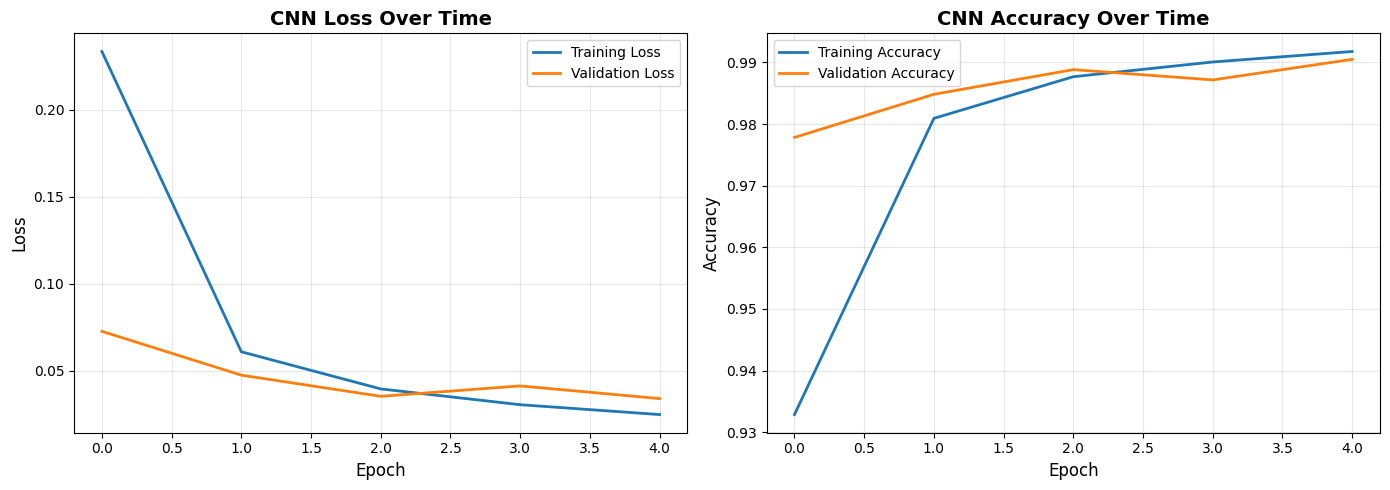

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('CNN Loss Over Time', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('CNN Accuracy Over Time', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('cnn_training_history.png', dpi=150, bbox_inches='tight')
print("✓ Saved to 'cnn_training_history.png'")
plt.show()
plt.close()

In [129]:
# ============================================
# PART 7: COMPARE PREDICTIONS
# ============================================

In [130]:
print("\n" + "="*60)
print("🔍 Sample Predictions")
print("="*60)


🔍 Sample Predictions


✓ Saved to 'cnn_predictions.png'


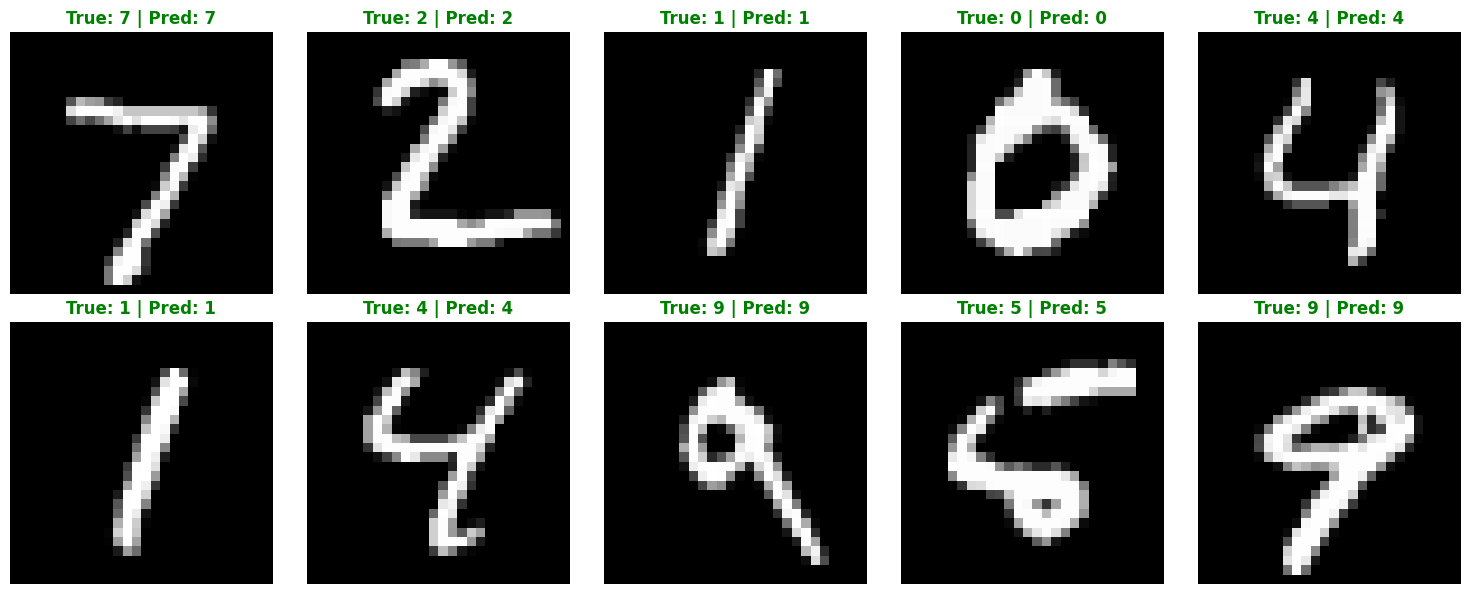

In [131]:
predictions = model.predict(x_test[:10], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test[:10]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    is_correct = predicted_classes[i] == true_classes[i]
    color = 'green' if is_correct else 'red'
    axes[i].set_title(f'True: {true_classes[i]} | Pred: {predicted_classes[i]}',
                     color=color, fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('cnn_predictions.png', dpi=150, bbox_inches='tight')
print("✓ Saved to 'cnn_predictions.png'")
plt.show()
plt.close()

In [132]:
# ============================================
# DEBUGGING HELPER
# ============================================

In [133]:
print("\n" + "="*60)
print("🛠️  DEBUGGING TIPS")
print("="*60)


🛠️  DEBUGGING TIPS


#### Common Issues & Solutions:

1. Shape Mismatch Error:
   - Check x_train shape: Should be (60000, 28, 28, 1)
   - Use: x_train.reshape(-1, 28, 28, 1)

2. "None has no attribute" Error:
   - You have None in your model layers!
   - Replace None with actual Keras layers

3. Model compiles but doesn't train:
   - Check if you called model.fit()
   - Make sure history = model.fit() to capture results

4. Low accuracy (<90%):
   - Check if data is normalized (divide by 255.0)
   - Verify one-hot encoding is correct
   - Make sure optimizer='adam' not 'sgd'

5. Expected shapes at each layer:
   Conv2D output: (Input - Kernel + 1) = (28 - 3 + 1) = 26
   After MaxPool: 26 / 2 = 13
   After Conv2D: 13 - 3 + 1 = 11
   After MaxPool: 11 / 2 = 5 (5.5 rounded down)
   After Flatten: 5 * 5 * 64 = 1600

Reference:

- Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))
- MaxPooling2D((2,2))
- Conv2D(64, (3,3), activation='relu')
- MaxPooling2D((2,2))
- Flatten()
- Dense(128, activation='relu')
- Dense(10, activation='softmax')

### Visualizing what CNN learned

In [134]:
"""
CNN Visualization: See What Your Network Actually Learned!

This will blow your mind! 🤯

We'll visualize:
1. Conv Layer 1 Filters - What patterns does it detect?
2. Feature Maps - How does the CNN "see" a digit?
3. Layer Activations - What happens at each layer?
4. Misclassifications - Where does the network struggle?

Load your trained model first, then run this!
"""

'\nCNN Visualization: See What Your Network Actually Learned!\n\nThis will blow your mind! 🤯\n\nWe\'ll visualize:\n1. Conv Layer 1 Filters - What patterns does it detect?\n2. Feature Maps - How does the CNN "see" a digit?\n3. Layer Activations - What happens at each layer?\n4. Misclassifications - Where does the network struggle?\n\nLoad your trained model first, then run this!\n'

In [135]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [136]:
# ============================================
# LOAD YOUR TRAINED MODEL
# ============================================

In [137]:
print("="*60)
print("🔧 Setup: Load Your Trained CNN")
print("="*60)

🔧 Setup: Load Your Trained CNN


In [138]:
"""
IMPORTANT: Run your training code first, then run this!

If you saved your model:
    model = keras.models.load_model('mnist_cnn_model.h5')

If you have it in memory already:
    Just use 'model' variable from your training code
"""

"\nIMPORTANT: Run your training code first, then run this!\n\nIf you saved your model:\n    model = keras.models.load_model('mnist_cnn_model.h5')\n\nIf you have it in memory already:\n    Just use 'model' variable from your training code\n"

In [139]:
# Load test data
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print("✓ Model and data ready!")
print(f"Model has {len(model.layers)} layers")

✓ Model and data ready!
Model has 7 layers


In [140]:
# ============================================
# PART 1: VISUALIZE FIRST LAYER FILTERS
# ============================================

In [141]:
print("\n" + "="*60)
print("🔍 PART 1: First Layer Filters (Edge Detectors!)")
print("="*60)


🔍 PART 1: First Layer Filters (Edge Detectors!)


In [142]:
"""
The first Conv2D layer learned 32 filters.
Each filter is a 3×3 pattern detector.

Let's see what patterns they detect!
"""

"\nThe first Conv2D layer learned 32 filters.\nEach filter is a 3×3 pattern detector.\n\nLet's see what patterns they detect!\n"

In [143]:
# Get weights from first Conv2D layer
first_conv_layer = model.layers[0]
filters, biases = first_conv_layer.get_weights()

print(f"Filter shape: {filters.shape}")  # (3, 3, 1, 32)
print(f"This means: 3×3 kernel, 1 input channel, 32 filters")

Filter shape: (3, 3, 1, 32)
This means: 3×3 kernel, 1 input channel, 32 filters


In [144]:
# Normalize filters for visualization
f_min, f_max = filters.min(), filters.max()
filters_normalized = (filters - f_min) / (f_max - f_min)

✓ Saved to 'cnn_filters_layer1.png'


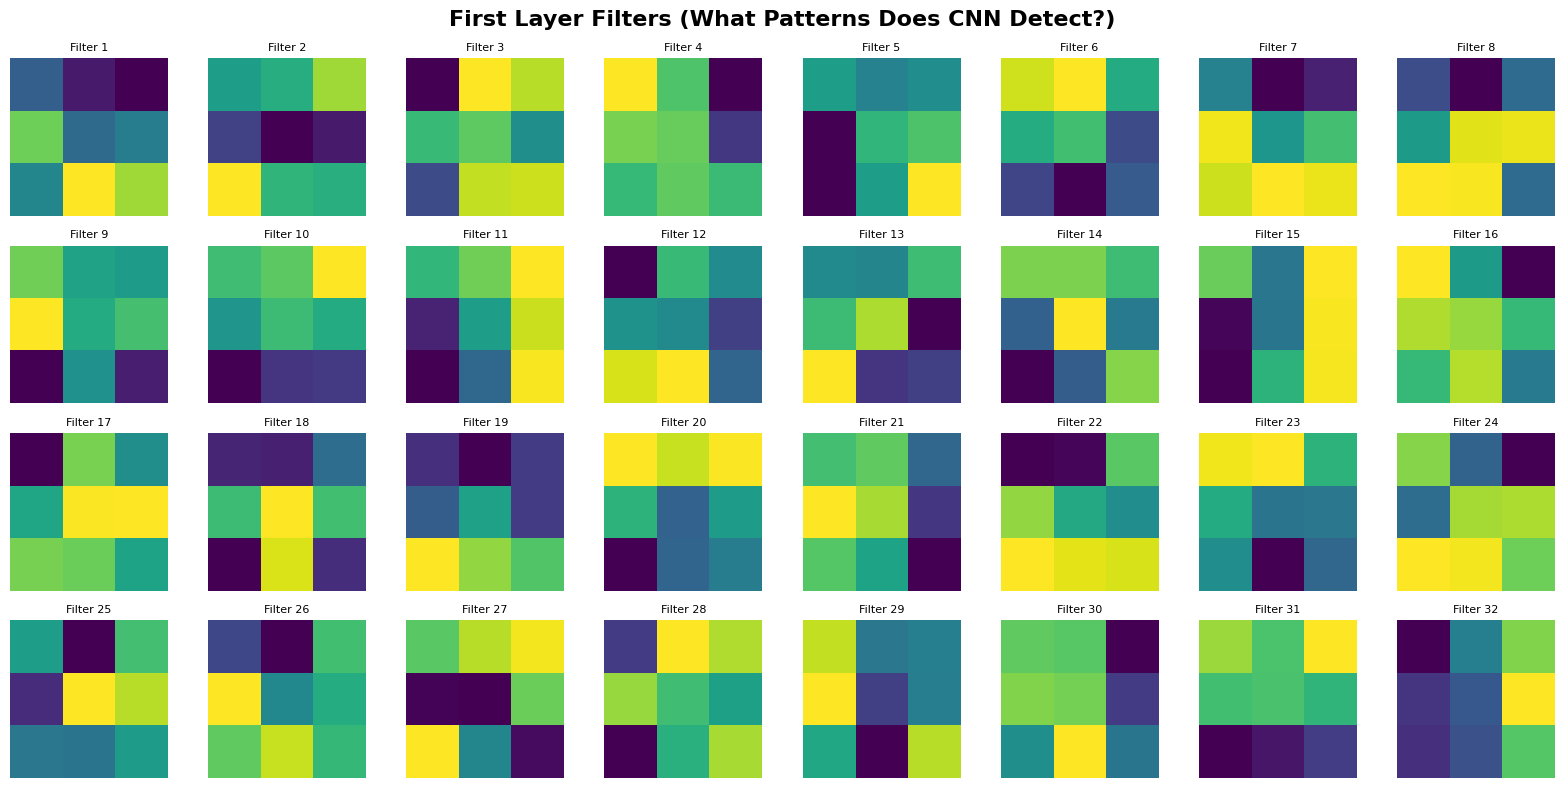

In [145]:
# Plot all 32 filters
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('First Layer Filters (What Patterns Does CNN Detect?)', 
             fontsize=16, fontweight='bold')

for i in range(32):
    ax = axes[i // 8, i % 8]
    # Extract filter (3×3×1) and squeeze to 2D
    filter_img = filters_normalized[:, :, 0, i]
    ax.imshow(filter_img, cmap='viridis')
    ax.set_title(f'Filter {i+1}', fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.savefig('cnn_filters_layer1.png', dpi=150, bbox_inches='tight')
print("✓ Saved to 'cnn_filters_layer1.png'")
plt.show()
plt.close()

#### 💡 What to look for in filters:
- Bright/dark edges → Edge detectors
- Diagonal patterns → Diagonal line detectors
- Corners → Corner detectors
- Gradients → Texture detectors

These weren't programmed - the network LEARNED them!

In [146]:
# ============================================
# PART 2: VISUALIZE FEATURE MAPS
# ============================================

In [147]:
print("\n" + "="*60)
print("🎨 PART 2: Feature Maps (How CNN 'Sees' a Digit)")
print("="*60)


🎨 PART 2: Feature Maps (How CNN 'Sees' a Digit)


```py
Feature maps show the output of each filter when applied to an image.
High activation = "I detected my pattern here!"
```

In [148]:
# Free the RAM at the end
from tensorflow.keras import backend as K
import gc
K.clear_session()
gc.collect()

0